In [2]:
!pip install --upgrade packaging

  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4


In [3]:
!pip install transformers --upgrade --use-feature=2020-resolver

In [4]:
import packaging
print("Packaging version:", packaging.__version__)



Packaging version: 24.2


In [1]:
from transformers import pipeline
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")

C:\Users\Vanathi\anaconda3\lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Vanathi\.cache\huggingface\hub\models--j-hartmann--emotion-english-distilroberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back 

AttributeError: module 'torch.nn.utils' has no attribute 'parametrizations'

In [6]:
!pip install --upgrade typing_extensions


  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3


In [ ]:
!pip install --upgrade torch


In [1]:
from transformers import pipeline

classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", top_k=1)
classifier("This movie was a delightful surprise!")


C:\Users\Vanathi\anaconda3\lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Vanathi\.cache\huggingface\hub\models--j-hartmann--emotion-english-distilroberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


[[{'label': 'joy', 'score': 0.9543430805206299}]]

In [4]:
df = pd.read_csv("C:/Users/Vanathi/mood-meets-media/data/external/netflix_titles.csv", encoding="ISO-8859-1")


In [5]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

In [7]:
import pandas as pd

# If not already loaded
#df = pd.read_csv("C:/Users/Vanathi/mood-meets-media/data/external/netflix_titles.csv", encoding="cp1252")

# Keep only needed columns
df = df[["title", "type", "listed_in", "description"]].dropna()

# Define mood extraction function
def classify_mood(text):
    try:
        result = classifier(text[:512])  # Hugging Face limit is 512 tokens
        return result[0]['label']
    except:
        return "Neutral"

# Apply mood classification
df["mood_tag"] = df["description"].apply(classify_mood)


In [8]:
# Use top_k=None to get all emotions and scores
full_classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", top_k=None)

# Try on a sample
sample = "A heartwarming story of friendship and courage."
scores = full_classifier(sample)
print(scores)


[[{'label': 'joy', 'score': 0.9734006524085999}, {'label': 'neutral', 'score': 0.01155413780361414}, {'label': 'surprise', 'score': 0.007368728052824736}, {'label': 'sadness', 'score': 0.00499831372871995}, {'label': 'disgust', 'score': 0.001218730234540999}, {'label': 'fear', 'score': 0.0008531378116458654}, {'label': 'anger', 'score': 0.0006063509499654174}]]


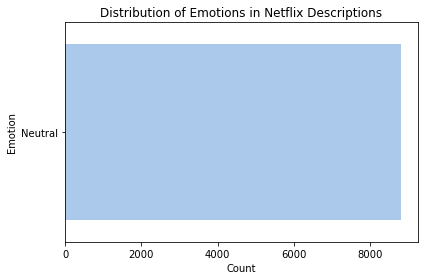

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot counts of mood_tag (the top emotion assigned)
sns.countplot(y=df['mood_tag'], order=df['mood_tag'].value_counts().index, palette="pastel")
plt.title("Distribution of Emotions in Netflix Descriptions")
plt.xlabel("Count")
plt.ylabel("Emotion")
plt.tight_layout()
plt.show()


In [10]:
df = df.rename(columns={"listed_in": "genre", "description": "tags"})
df.to_csv("C:/Users/Vanathi/mood-meets-media/data/processed/netflix_enriched_metadata.csv", index=False)
print("✅ Netflix metadata with mood tagging saved!")


✅ Netflix metadata with mood tagging saved!
